In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("./dataset/sonar.csv",header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
df.shape

(208, 61)

In [7]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [8]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

<Axes: xlabel='60'>

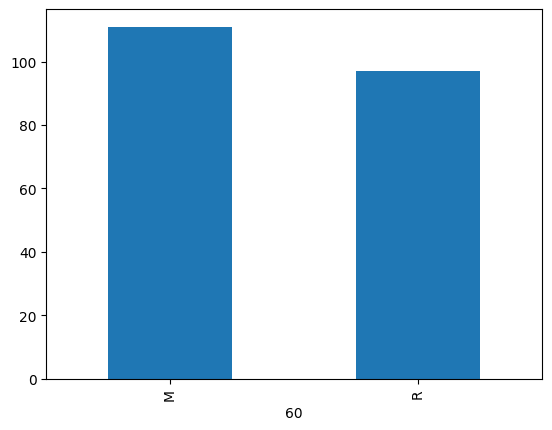

In [9]:
df[60].value_counts().plot(kind='bar')

In [10]:
X=df.drop(60,axis=1)
y=df[60]

In [11]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [12]:
y.replace({'R':1,'M':0},inplace=True)

C:\Users\Iftekhar\AppData\Local\Temp\ipykernel_11552\3257840441.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace({'R':1,'M':0},inplace=True)


In [15]:
y.value_counts()

60
0    111
1     97
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [19]:
X_train.shape

(166, 60)

In [18]:
import tensorflow as tf
from tensorflow import keras

In [21]:
model=keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,),activation='relu'),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100,batch_size=10)

Epoch 1/100
17/17 [==============================] - 1s 2ms/step - loss: 0.6698 - accuracy: 0.5904
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.6265
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.7108
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.7349
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.7590
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.7470
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4917 - accuracy: 0.7530
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.8193
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8133
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.8193
Epoch 11/

In [22]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 1s 5ms/step - loss: 1.3074 - accuracy: 0.7619


[1.3074023723602295, 0.761904776096344]

In [24]:
y_pred=model.predict(X_test)
y_pred=np.round(y_pred).astype(int).reshape(-1)
y_pred

2/2 [==============================] - 0s 2ms/step


array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [27]:
y_test[:10]

186    0
155    0
165    0
200    0
58     1
34     1
151    0
18     1
202    0
62     1
Name: 60, dtype: int64

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17  3]
 [ 7 15]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.83      0.68      0.75        22

    accuracy                           0.76        42
   macro avg       0.77      0.77      0.76        42
weighted avg       0.77      0.76      0.76        42



In [29]:
import seaborn as sns

<Axes: >

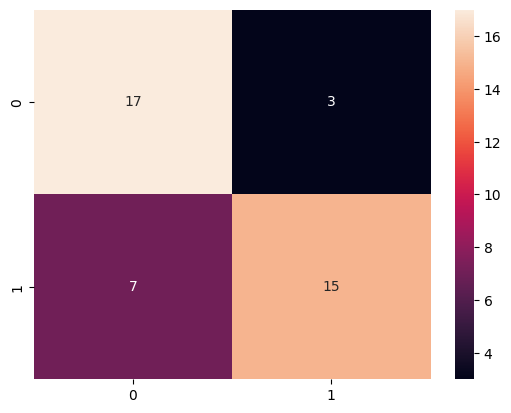

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

***Using Dropout Layer***

In [56]:
model2=keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1,activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7147 - accuracy: 0.4518
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.5241
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5482
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5301
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5301
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5843
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5181
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5542
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.5241
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5663
Epoch 11/

In [57]:
model2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.5425 - accuracy: 0.8095


[0.54253751039505, 0.8095238208770752]

In [59]:
y_pred=model2.predict(X_test)
y_pred=np.round(y_pred).astype(int).reshape(-1)
y_pred

2/2 [==============================] - 0s 4ms/step


array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [60]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17  3]
 [ 5 17]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.85      0.77      0.81        22

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42

